In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

train = pd.read_csv('ann/train.csv', )
test = pd.read_csv('ann/test.csv')
df = pd.concat([train,test], axis =0, sort = True)
df.drop('Cabin',axis=1,inplace=True)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


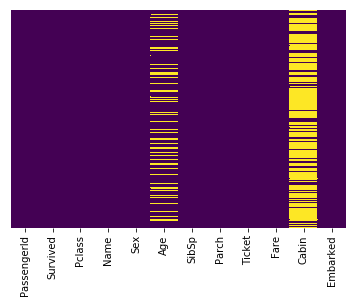

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

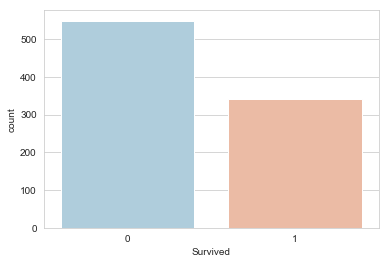

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

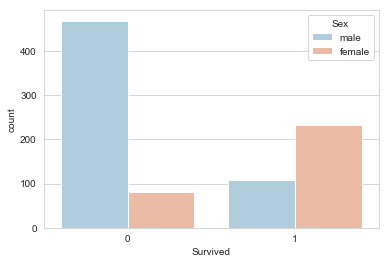

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

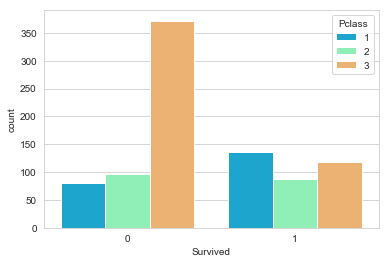

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

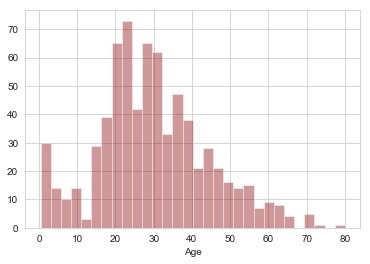

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

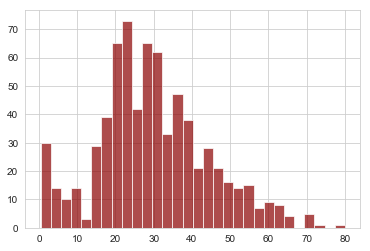

In [9]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

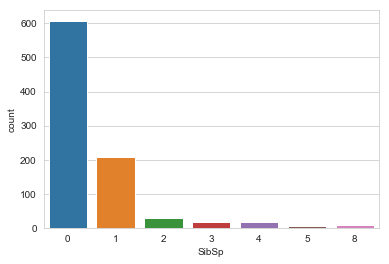

In [10]:
sns.countplot(x='SibSp',data=train)

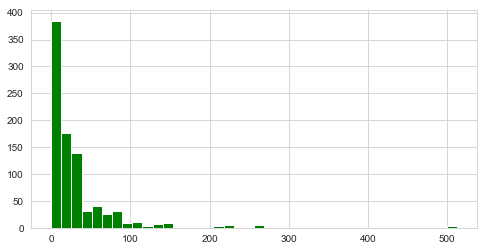

In [11]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

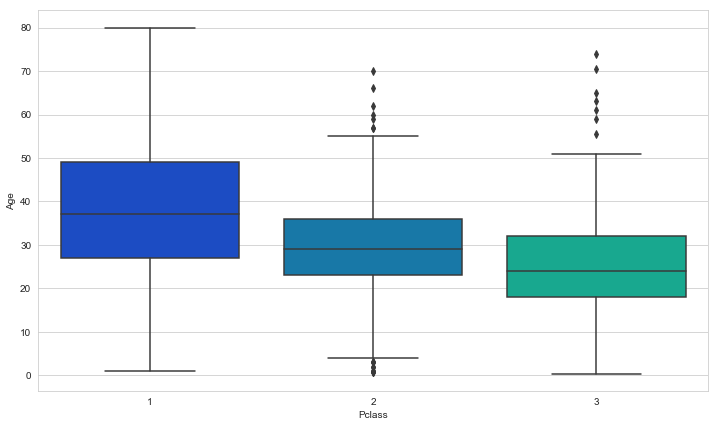

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [13]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 28

        else:
            return 25

    else:
        return Age

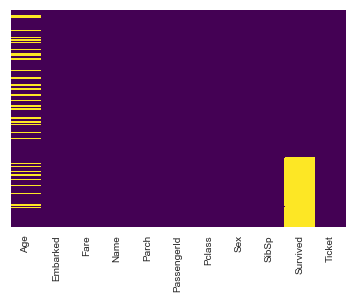

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df['Age'] = df[['Age','Pclass']].apply(age,axis=1)

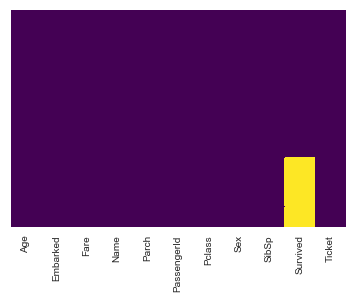

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
#Seperating training and testing data again
 
train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

In [17]:
# Load data as Pandas dataframe
train = pd.read_csv('train_clean.csv', )
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [18]:

# subset all categorical variables which need to be encodedcategorical = ['Sex']
for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var])], axis=1)
df.drop(['Sex','female'],axis=1,inplace=True)
df.rename(columns = {'male':'Sex'},inplace=True)

In [19]:

categorical = ['Embarked']
df['Fare']=df['Fare'].fillna(df['Fare'].median())
df['Fare'].isnull().sum()
for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)

In [20]:
#Dropping the already encoded columns
df.drop(['Name', 'Ticket', 'PassengerId','Embarked'], axis=1, inplace=True)

continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [21]:
#scaling all continous attributes to convert in same range
for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))
df.drop('Embarked_C',axis=1,inplace=True)
X_train = df[pd.notnull(df['Survived'])]
X_train = X_train.drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])]
X_test = X_test.drop(['Survived'], axis=1)


In [22]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

C:\Users\OMKAR\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\OMKAR\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\OMKAR\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\OMKAR\Anaconda

In [23]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 4, kernel_initializer= 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dropout(rate = 0.2))
    
    #second hidden layer, therefore, does not require the no. of inputs
    classifier.add(Dense(units = 4, kernel_initializer= 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.2))    
    #creating output layer
    classifier.add(Dense(units = 1, kernel_initializer= 'uniform', activation = 'sigmoid'))
    #comipiling the ANN model
    classifier.compile(optimizer='adam', loss = 'binary_crossentropy',  metrics=['accuracy'])
    
    return classifier

In [24]:
'''
BEST PARAMETERS: 
    
    batch_size: 32
    nb_epoch: 50
    dropout: 0.2

'''
#grid_search = grid_search.fit(X_train, y_train)
#best_parameters = grid_search.best_params_
#best_accuracy = grid_search.best_score_
classifier = KerasClassifier(build_fn=build_classifier, batch_size = 32, nb_epoch = 50)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=1)


Epoch 1/1
90/90 [==============================] - 0s 709us/step
Epoch 1/1
89/89 [==============================] - 0s 840us/step
Epoch 1/1
89/89 [==============================] - 0s 961us/step
Epoch 1/1
89/89 [==============================] - 0s 1ms/step
Epoch 1/1
89/89 [==============================] - 0s 1ms/step
Epoch 1/1
89/89 [==============================] - 0s 1ms/step
Epoch 1/1
89/89 [==============================] - 0s 1ms/step
Epoch 1/1
89/89 [==============================] - 0s 2ms/step
Epoch 1/1
89/89 [==============================] - 0s 2ms/step
Epoch 1/1
89/89 [==============================] - 0s 2ms/step


In [25]:
#final model creation
classifier = build_classifier()
stats = classifier.fit(X_train, y_train, batch_size=32, epochs=50)



Epoch 1/50
891/891 [==============================] - 1s 808us/step - loss: 0.6915 - acc: 0.6162
Epoch 2/50
891/891 [==============================] - 0s 51us/step - loss: 0.6871 - acc: 0.6162
Epoch 3/50
891/891 [==============================] - 0s 50us/step - loss: 0.6780 - acc: 0.6162
Epoch 4/50
891/891 [==============================] - 0s 50us/step - loss: 0.6648 - acc: 0.6162
Epoch 5/50
891/891 [==============================] - 0s 49us/step - loss: 0.6440 - acc: 0.6162
Epoch 6/50
891/891 [==============================] - 0s 50us/step - loss: 0.6264 - acc: 0.6162
Epoch 7/50
891/891 [==============================] - 0s 51us/step - loss: 0.6146 - acc: 0.6162
Epoch 8/50
891/891 [==============================] - 0s 51us/step - loss: 0.6108 - acc: 0.6162
Epoch 9/50
891/891 [==============================] - 0s 46us/step - loss: 0.5955 - acc: 0.6162
Epoch 10/50
891/891 [==============================] - 0s 53us/step - loss: 0.5948 - acc: 0.6162
Epoch 11/50
891/891 [=================

In [26]:

print(np.mean(stats.history['acc']))



0.7389674523763784


In [27]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

y_test = pd.read_csv('ann/gender_submission.csv')
y_test = y_test.iloc[:,1:]


In [28]:

from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred)
d = pd.DataFrame(y_pred)
d.to_csv('test_predictions.csv', index=False)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       266
          1       0.90      0.84      0.87       152

avg / total       0.91      0.91      0.91       418



In [ ]:
#####################################   SVM    ##################################################

In [43]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[255  11]
 [ 10 142]]


In [45]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       266
          1       0.93      0.93      0.93       152

avg / total       0.95      0.95      0.95       418



In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [47]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, kernel=rbf, gamma=1 ......................................
[CV]  C=0.1, kernel=rbf, gamma=1, score=0.7643097643097643, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................
[CV]  C=0.1, kernel=rbf, gamma=1, score=0.6902356902356902, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=1 ......................................
[CV]  C=0.1, kernel=rbf, gamma=1, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV]  C=0.1, kernel=rbf, gamma=0.1, score=0.7609427609427609, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV]  C=0.1, kernel=rbf, gamma=0.1, score=0.8047138047138047, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.1 ....................................
[CV]  C=0.1, kernel=rbf, gamma=0.1, score=0.8047138047138047, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.01 ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, kernel=rbf, gamma=0.0001, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV]  C=0.1, kernel=rbf, gamma=0.0001, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV]  C=0.1, kernel=rbf, gamma=0.0001, score=0.6161616161616161, total=   0.0s
[CV] C=1, kernel=rbf, gamma=1 ........................................
[CV]  C=1, kernel=rbf, gamma=1, score=0.7845117845117845, total=   0.0s
[CV] C=1, kernel=rbf, gamma=1 ........................................
[CV]  C=1, kernel=rbf, gamma=1, score=0.8148148148148148, total=   0.0s
[CV] C=1, kernel=rbf, gamma=1 ........................................
[CV]  C=1, kernel=rbf, gamma=1, score=0.8013468013468014, total=   0.0s
[CV] C=1, kernel=rbf, gamma=0.1 ......................................
[CV]  C=1, kernel=rbf, gamma=0.1, score=0.8080808080808081, total=   0.0s
[CV] C=1, kernel=rbf, gamma=0.1 ...............

[CV]  C=1000, kernel=rbf, gamma=0.0001, score=0.7710437710437711, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [48]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [49]:
model = SVC(C=100, kernel='rbf', gamma=0.01)
model.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
grid_predictions = grid.predict(X_test)

In [51]:
print(confusion_matrix(y_test,grid_predictions))

[[260   6]
 [  7 145]]


In [52]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       266
          1       0.96      0.95      0.96       152

avg / total       0.97      0.97      0.97       418

